In [1]:
intro_images_path='./Images/Intro_images/'
edge_images_path='../'#../Images/Edge_images/'
seg_images_path='../'#../Images/Seg_images/'
feature_images_path='../'#../Images/Feature_images/'
output_path='./Images/Outputs/'
print('Image paths ....')

Image paths ....


# COMPUTER VISION I

**Master in Artificial Intelligence, USC, UDC, UVigo**

Academic year 2022/23


<img src="./Logotipo_Solo.png" width=200/>

## Image Processing

- Arithmetic and logical operation
- Histogram equalization
- Convolution
- Correlation
- Image pyramids
- Template matching



http://szeliski.org/Book/

### Image difference 

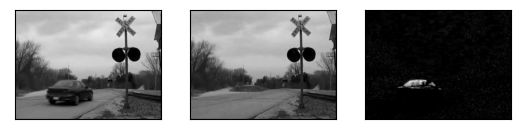

In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

bg = cv2.imread(intro_images_path+'background.png',0)
fg = cv2.imread(intro_images_path+'foreground.png',0)

motion =np.absolute(cv2.subtract(fg,bg))

plt.subplot(131), plt.imshow(fg, 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(bg,'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(motion, 'gray')
plt.xticks([]), plt.yticks([])
#plt.subplot(224), plt.plot(hist_full)
plt.show()

### Exercise Histogram Equalization in OpenCV

https://docs.opencv.org/3.4.2/d5/daf/tutorial_py_histogram_equalization.html

OpenCV has a function to do this, cv2.equalizeHist(). Its input is just a grayscale image and output is its histogram equalized image. You can take different images with different light conditions, equalize them and check the results.

Histogram equalization is good when the histogram of an image is confined to a particular region. It doesn’t work on images where both bright and dark pixels are present. In these cases and adaptive equalization is more convinient.


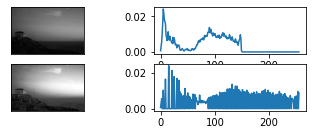

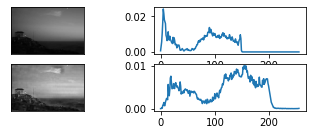

In [9]:
img = cv2.imread(intro_images_path+'fisterra_gray.jpg',0)
equ = cv2.equalizeHist(img)
#res = np.hstack((img,equ)) #stacking images side-by-side
#cv2.imwrite('fisterra_gray_eq.png',res)
plt.subplot(421), plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([]) 
plt.subplot(423), plt.imshow(equ,'gray')
plt.xticks([]), plt.yticks([])


hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist_norm=hist/img.size
plt.subplot(422), plt.plot(hist_norm)
hist = cv2.calcHist([equ],[0],None,[256],[0,256])
hist_norm=hist/equ.size
plt.subplot(424), plt.plot(hist_norm)

plt.show()

plt.subplot(425), plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([]) 
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist_norm=hist/img.size
plt.subplot(426), plt.plot(hist_norm)

#Adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))
cl1 = clahe.apply(img)
plt.subplot(427), plt.imshow(cl1,'gray')
plt.xticks([]), plt.yticks([]) 

hist = cv2.calcHist([cl1],[0],None,[256],[0,256])
hist_norm=hist/cl1.size
plt.subplot(428), plt.plot(hist_norm)

plt.show()

## Convolution and Correlation

### Convolution filtering

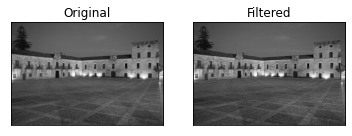

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(intro_images_path+'pazo.jpg',0)
kernel = np.array([[0, -1, 0], [-1, 5, -1],[0, -1,0]]) 
dst = cv2.filter2D(img,0,kernel)
plt.subplot(121),plt.imshow(img,'gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,'gray'), plt.title('Filtered')
plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imwrite('pazo.jpg',img)


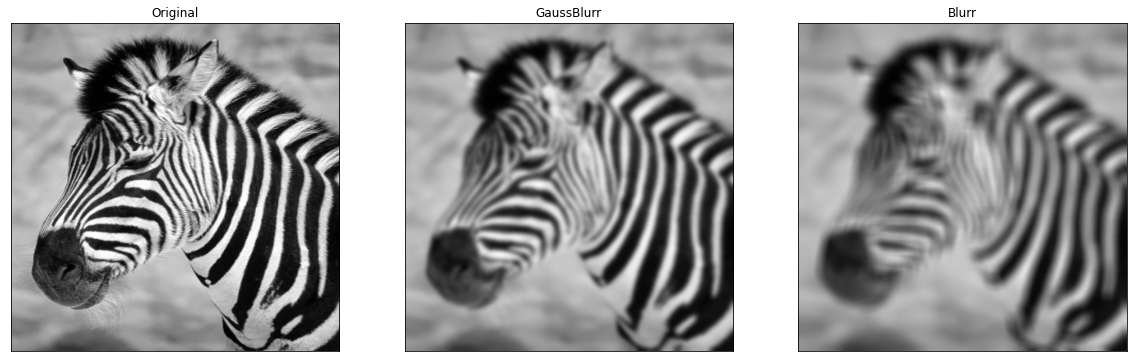

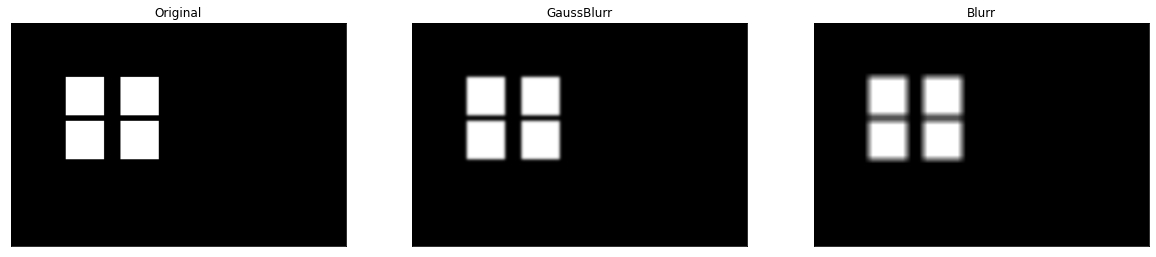

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(intro_images_path+'zebra.jpg')

blur1 = cv2.GaussianBlur(img,(15,15),0)
blur2 = cv2.blur(img,(15,15))

plt.figure(figsize= (0.05*img.shape[0],0.05*img.shape[1]))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur1,'gray'),plt.title('GaussBlurr')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur2),plt.title('Blurr')
plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('zebragb.jpg',blur1)
cv2.imwrite('zebrab.jpg',blur2)


img = cv2.imread(intro_images_path+'gate.jpg')

img2 = np.zeros(img.shape[:2], np.uint8)
img2[100:170, 100:170] = 255
img2[180:250, 100:170] = 255
img2[100:170, 200:270] = 255
img2[180:250, 200:270] = 255
blur1 = cv2.GaussianBlur(img2,(15,15),0)
blur2 = cv2.blur(img2,(15,15))

plt.figure(figsize= (0.05*img2.shape[0],0.05*img2.shape[1]))
plt.subplot(131),plt.imshow(img2,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur1,'gray'),plt.title('GaussBlurr')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur2,'gray'),plt.title('Blurr')
plt.xticks([]), plt.yticks([])
plt.show()

### Correlation filtering

**Exercise: Template Matching**
https://docs.opencv.org/3.4.2/d4/dc6/tutorial_py_template_matching.html

Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function cv2.matchTemplate() for this purpose. It simply slides the template image (T) over the input image (I), as in 2D correlation, and compares the template against each patch of the input image to give the image (R). Several comparison methods are implemented in OpenCV. They return a grayscale image (R), where each pixel denotes how much does the neighbourhood of that pixel match with template.


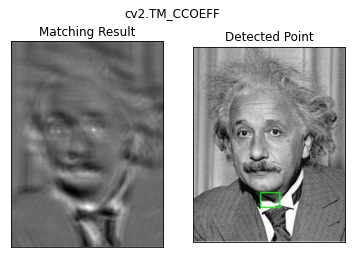

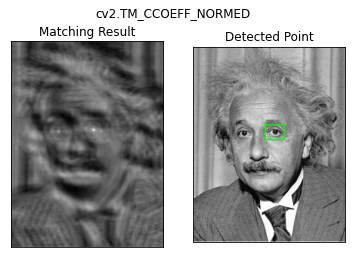

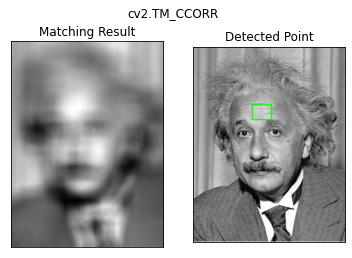

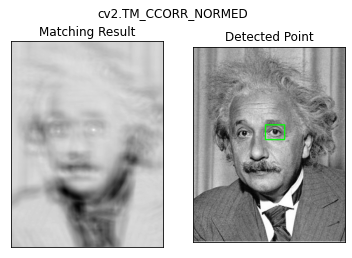

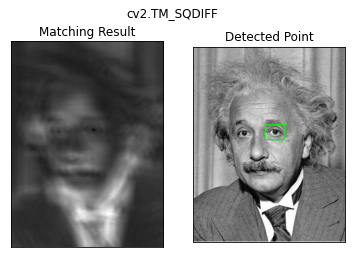

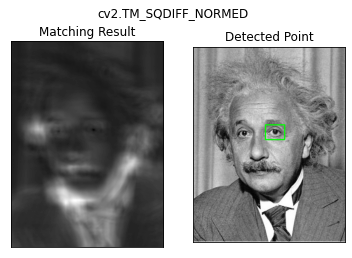

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(intro_images_path+'einstein.jpg',0)
img2 = img.copy()
template = cv2.imread(intro_images_path+'einstein_eye.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    cv2.rectangle(img,top_left, bottom_right, [0,255,0], 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    if method in [cv2.TM_CCOEFF_NORMED]:
      res=(res-min_val)/(max_val-min_val)*255
      cv2.imwrite('einstein_ccoeff_normed.jpg',res)

## Image Pyramids


An image pyramid is a collection of images usually obtained by downsampling a single original image. It is a set of layers in which the higher the layer, the smaller the size.


Image pyramids are used to achieve scale-invariant processing in contexts as the following:
- template matching
- interest point detection
- object detection


http://szeliski.org/Book/



### Gaussian pyramid

The basic idea for constructing Gaussian image pyramid is as follows:
- Gaussian smooth the image
- Reduce image dimensions by half by discarding every other row and and every other column
- Repeat this process until desired numbers levels are achieved or the image size reached a minimun






(491, 383)


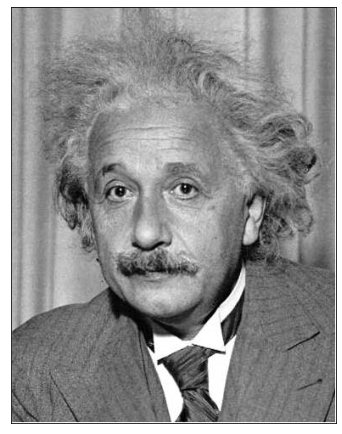

(246, 192)


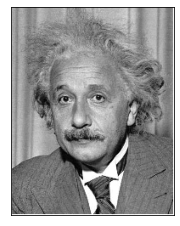

(123, 96)


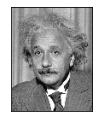

(62, 48)


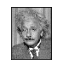

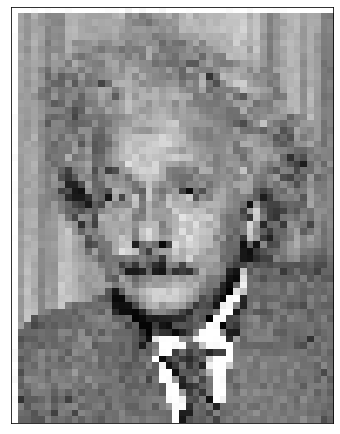

(491, 383)


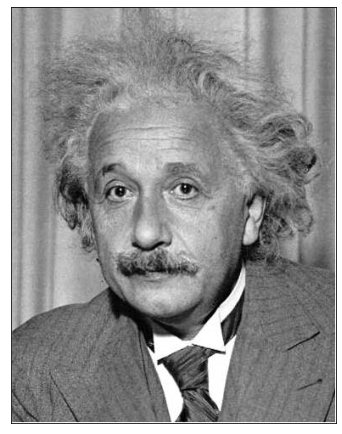

(246, 192)


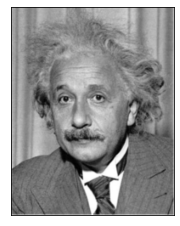

(123, 96)


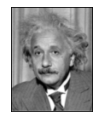

(62, 48)


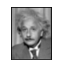

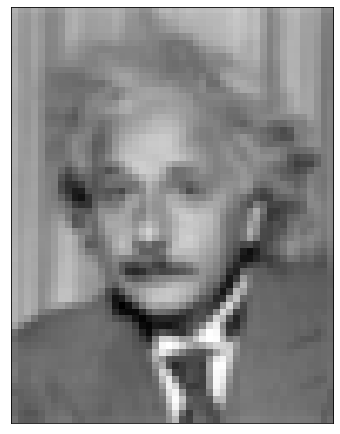

In [13]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from skimage import data

def pyramid_bf(image,l=5, minSizex=8, minSizey=8):
# yield the original image
    level=0
    yield image
    # keep looping over the pyramid
    while True:
        if level==l or image.shape[0]<minSizex or image.shape[1]<minSizey:
            break
        h,w=image.shape[:2]
        image=image[:h+1:2,:w+1:2]
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        # yield the next image in the pyramid
        yield image
        level=level+1
            
            
def pyramid_sm(image,l=5, minSizex=8, minSizey=8):
    level=0
    yield image
    while True:
        if level==l or image.shape[0]<minSizex or image.shape[1]<minSizey:
            break
        image = cv2.GaussianBlur(image,(5,5),0)
        h,w=image.shape[:2]
        image=image[:h+1:2,:w+1:2]
        
        yield image
        level=level+1

image = cv2.imread(intro_images_path + 'einstein.jpg',0)#'aliasing.jpg',0)#

for layer in pyramid_bf(image,l=3):
  print(layer.shape)
  plt.figure(figsize= (0.02*layer.shape[0],0.02*layer.shape[1]))
  plt.imshow(layer,cmap='gray')
  plt.xticks([]), plt.yticks([]) 
  plt.show()

plt.figure(figsize= (0.02*image.shape[0],0.02*image.shape[1]))
plt.imshow(layer,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

for layer in pyramid_sm(image, l=3):
  print(layer.shape)
  plt.figure(figsize= (0.02*layer.shape[0],0.02*layer.shape[1]))
  plt.imshow(layer,cmap='gray')
  plt.xticks([]), plt.yticks([]) 
  plt.show()

plt.figure(figsize= (0.02*image.shape[0],0.02*image.shape[1]))
plt.imshow(layer,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()


**Opencv function** has a specific function to downscale images:

(491, 383)


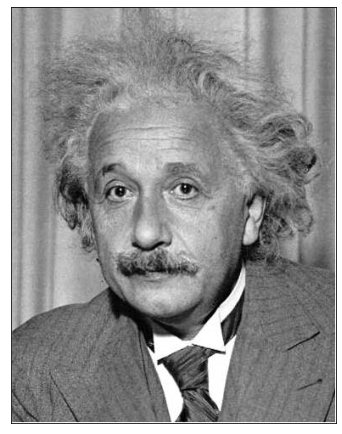

(491, 383)
(246, 192)


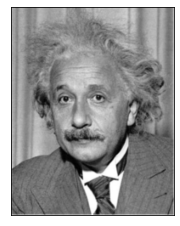

(123, 96)


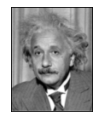

(62, 48)


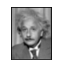

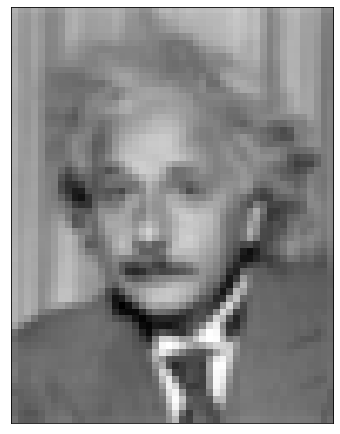

In [14]:
def pyramid(layer, l=4, minSizex=8, minSizey=8):
    level=0
    yield layer
    print(layer.shape)
    while True:
        layer = cv2.pyrDown(layer)
        if level== l or layer.shape[0]<minSizex or layer.shape[1]<minSizey:
            break
        yield layer
        level=level+1
        
for layer in pyramid(image, l=3):
  print(layer.shape)
  plt.figure(figsize= (0.02*layer.shape[0],0.02*layer.shape[1]))
  plt.imshow(layer,cmap='gray')
  plt.xticks([]), plt.yticks([]) 
  plt.show()

plt.figure(figsize= (0.02*image.shape[0],0.02*image.shape[1]))
plt.imshow(layer,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()


### Example of application: Template Matching

https://docs.opencv.org/3.4.2/d4/dc6/tutorial_py_template_matching.html

Template Matching is a method for searching and finding the location of a template image in a larger image. In order to cope with different sizes of the occurrence of the template we can take advantage of image pyramid.



### Exercise: Template matching and Gaussian pyramid

Based on the exercises about template matching and the construction of Gaussian pyramids try to detect as much tunas as posible in the image Tuna_Relative_Sizes.jpg given the template in Tuna_template.jpg.

Our goal for this practicum will be given an image of different tunas with different sizes try to match all of them employing OpenCV matching algorithms. The first step for this work will be to plot and analyze both the template image and the tunas image. This will give us information relative to the scales of the desired matches.

Template size:  (312, 703)
Image size:  (3564, 2971)


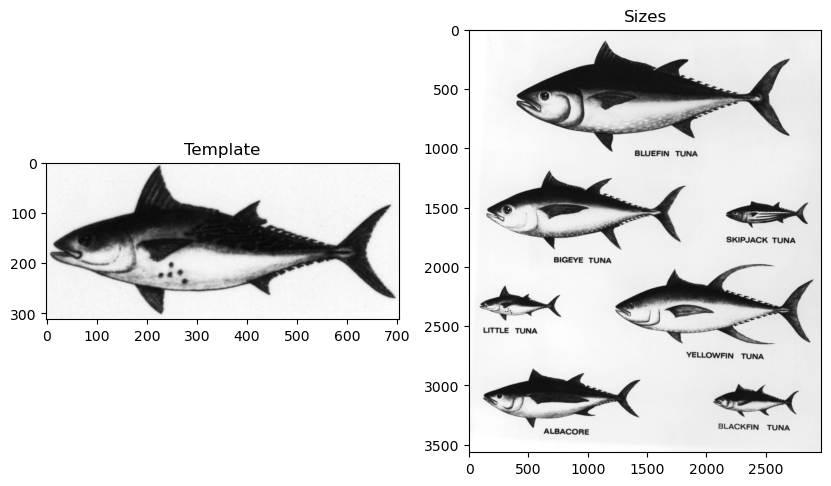

In [20]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

intro_images_path='./Images/Intro_images/'

# Read the template and image
tuna_template = cv2.imread(intro_images_path+'Tuna_template.jpg', cv2.IMREAD_GRAYSCALE)
tuna_sizes = cv2.imread(intro_images_path+'Tuna_Relative_Sizes.jpg', cv2.IMREAD_GRAYSCALE)

# Print template and image sizes
print('Template size: ', tuna_template.shape)
print('Image size: ', tuna_sizes.shape)

# Plot the template and the image
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(tuna_template, cmap='gray')
plt.title('Template')
plt.subplot(122),plt.imshow(tuna_sizes, cmap='gray')
plt.title('Sizes')
plt.show()


As we can see the template has an aproximate dimensions of 700x300 while the image that will be performing the matches has an aproximate size of 3000x3500. The biggest tuna that we want to match has a size that is almost a 70% of the width of the image, this being more than 2000 pixels of width. As our template image is smaller than that we will need to resize it. 

Template size:  (1248, 2812)


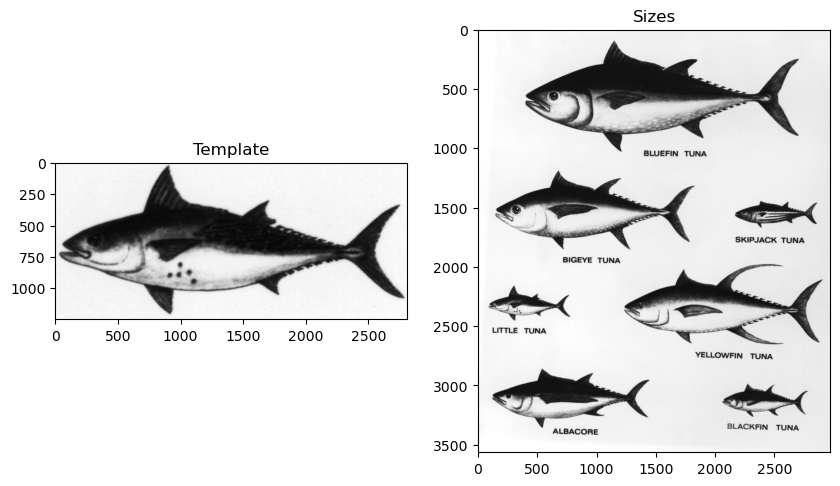

In [21]:
# resize tuna template to three times its size
tuna_template = cv2.resize(tuna_template, (0,0), fx=4, fy=4)
print('Template size: ', tuna_template.shape)

# Plot the template and the image
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(tuna_template, cmap='gray')
plt.title('Template')
plt.subplot(122),plt.imshow(tuna_sizes, cmap='gray')
plt.title('Sizes')
plt.show()

In order to attempt to increase the details of the images we will perform an histogram equalization. Thanks to this the details on the tunas will be more visible and easier to match with the template. We performed tests using opencv equalization and adaptative histogram equalization algorithm.

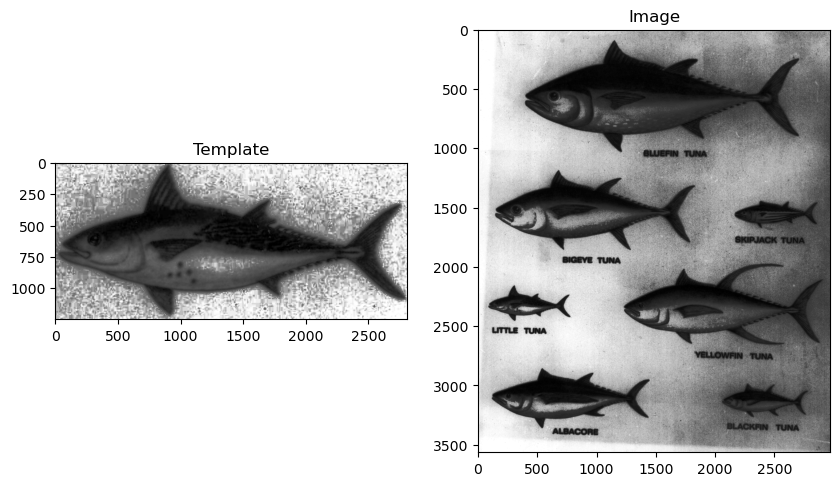

In [13]:
# equalize histogram
tuna_template_eq = cv2.equalizeHist(tuna_template)
tuna_sizes_eq = cv2.equalizeHist(tuna_sizes)

# Plot the template and the image
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(tuna_template_eq, cmap='gray')
plt.title('Template')
plt.subplot(122),plt.imshow(tuna_sizes_eq, cmap='gray')
plt.title('Sizes')
plt.show()


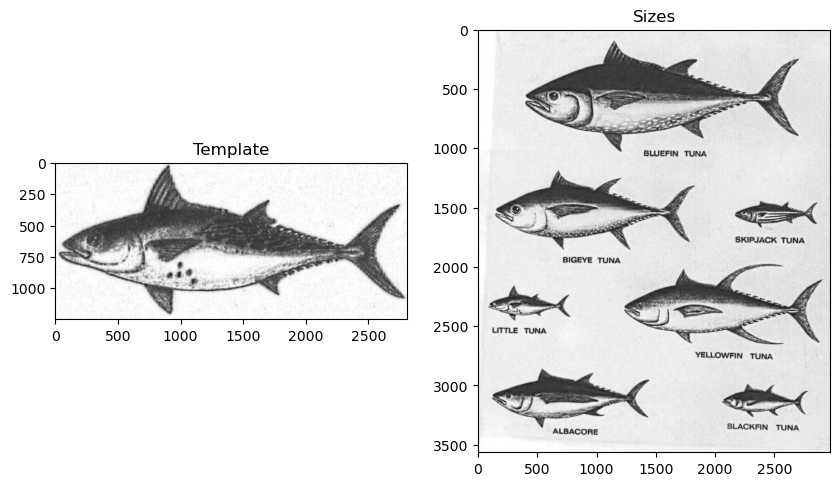

In [26]:
def adaptative_histogram_equalization(image, clip_limit=2.0, grid_size=(8,8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    return clahe.apply(image)  

tuna_sizes_eq = adaptative_histogram_equalization(tuna_sizes, clip_limit=4.0, grid_size=(128,128))
tuna_template_eq = adaptative_histogram_equalization(tuna_template, clip_limit=4.0, grid_size=(128,128))

# Plot the template and the image
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(tuna_template_eq, cmap='gray')
plt.title('Template')
plt.subplot(122),plt.imshow(tuna_sizes_eq, cmap='gray')
plt.title('Sizes')
plt.show()

As expected, the adaptative histogram equalization algorithm outperformed the opencv implementation as it ignores most of the noise in the pictures, giving us clearer output images. For the next steps we will continue using the clahe images. Now, as most tunas in the Sizes image have different sizes we would like to generate a pyramid of the template. The problem with this is that the default pyramid generator algorithm downscales the images to half its size, and as we can see in the Sizes image the tunas scale is not always one-half. In order to deal with this problem we will implement a custom pyramid function that allows us to downscale at an specific scale.

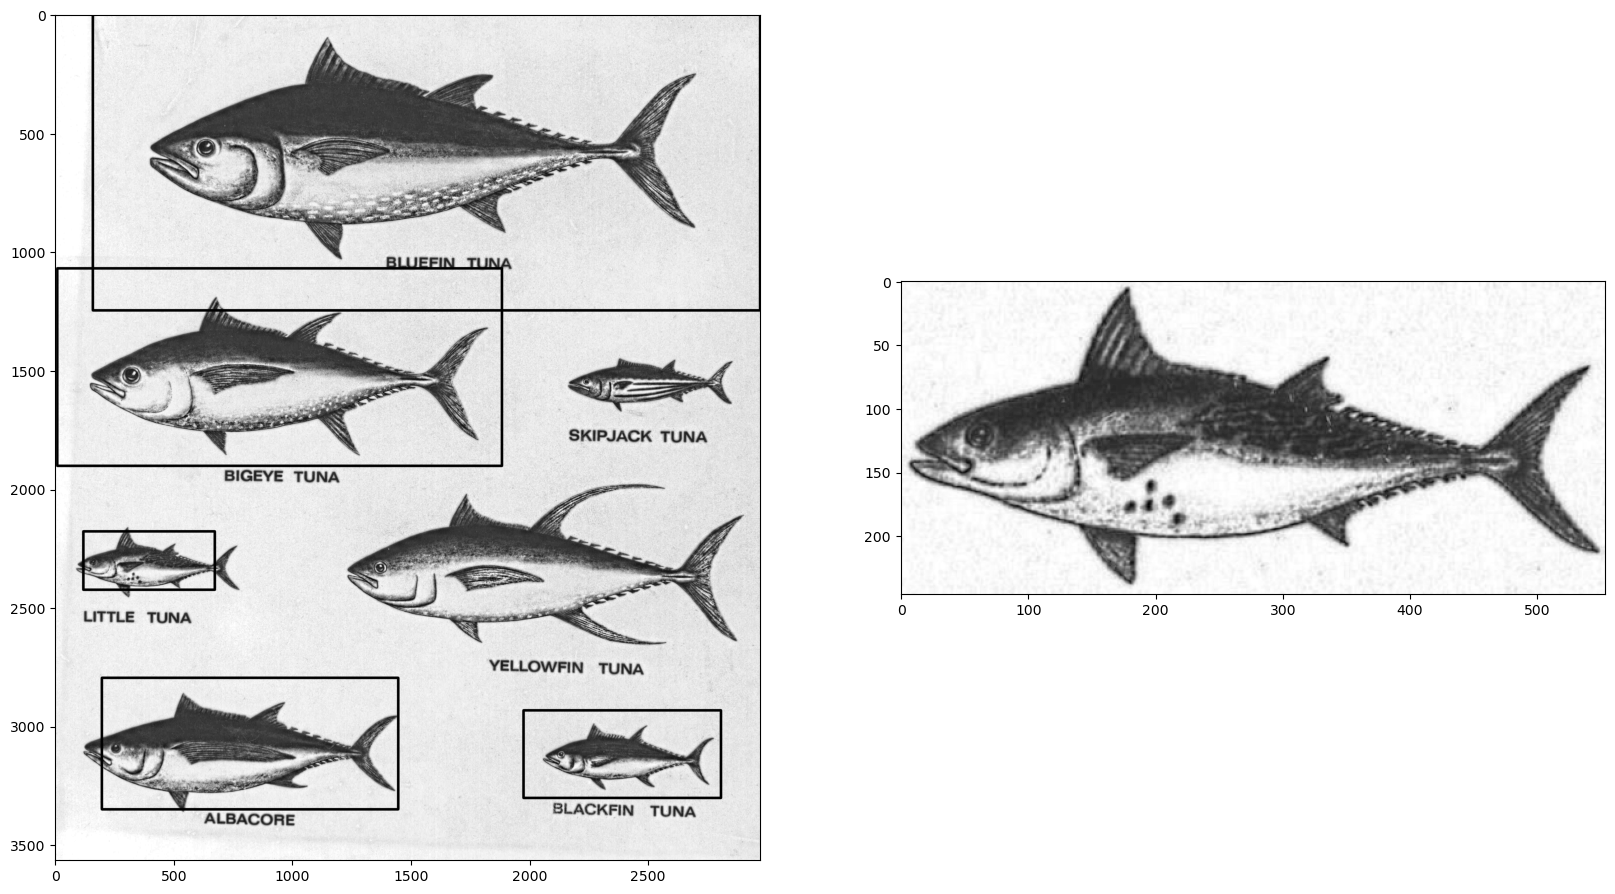

True

In [29]:
# custom pyramid function
def gaussian_pyramid(image, scale=2, minSize=(200, 200)):
   yield image
   while True:
     w = int(image.shape[1] / scale)
     h = int(image.shape[0] / scale)
     image = cv2.resize(image, (w, h))
     if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
        break
     yield image

# create a list of all the pyramid layers
tuna_template_pyramid = list(gaussian_pyramid(tuna_template_eq, scale=1.5))
tuna_image_rectangles = tuna_sizes_eq.copy()

# loop over the layers of the tuna image pyramid 
for tuna_template_layer in tuna_template_pyramid:
   # match the tuna template to the tuna image using cv2.TM_CCOEFF_NORMED
   result = cv2.matchTemplate(tuna_sizes_eq, tuna_template_layer, cv2.TM_CCOEFF_NORMED)
   # find the location of the best match
   min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
   # draw a rectangle around the best match
   cv2.rectangle(tuna_image_rectangles, max_loc, (max_loc[0] + tuna_template_layer.shape[1], max_loc[1] + tuna_template_layer.shape[0]), (0, 255, 0), 10)
   

# show tuna_image and tuna_template_layer in a pyplot figure
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(tuna_image_rectangles, cmap='gray')
plt.subplot(122)
plt.imshow(tuna_template_layer, cmap='gray')
plt.show()

# save rectangles image
cv2.imwrite('tuna_image_rectangles.jpg', tuna_image_rectangles)

The resulting image identified most tunas in the Sizes image, with the obvious exception of (i) Skipjack tuna that is not getting detected due to the black lines on its chest and (ii)) Yellowfin tuna, that is not getting detected due to its huge fins. Skipjack tuna may get detected if we employ an erosion to the Size image in order to remove the black lines on its chest, however, it is still unclear to us how the Yellowfish tuna could be detected as its shape is quite different from the template tuna.